In [30]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# EPFL Machine Learning Higgs

TODO description

## 1. Load the training data into feature matrix, class labels, and event ids:

In [31]:
from proj1_helpers import *
from implementations import *
from cross_validation import *
from plots import *

In [3]:
DATA_TRAIN_PATH = 'data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## 2. Data pre-processing

Before any attempt to prediction, we perform some data cleaning (TODO) and preprocessing. We start by standardising our training dataset.

In [4]:
tx = standardise(tX)
# TODO proof of success ?

In [60]:
w, loss = reg_logistic_regression(y, tx, lambda_=1, initial_w=np.random.rand(30), max_iters=50, gamma=0.1)

/home/noyt/Desktop/MA1/ML_CS433/ML2020_PR1/implementations.py:212: RuntimeWarning: overflow encountered in exp
  ret = 1 / (1 + np.exp(-t))


## 3. Classic ML methods

The following predictions are made using the functions implemented during the course labs.

### 3.1 Least Squares GD

In [70]:
initial_w = np.random.rand(30)
w, loss = least_squares_GD(y, tx, initial_w, 50, 0.01)

In [ ]:
#### testing answer

kwargs = {}
kwargs['initial_w'] = np.random.rand(30)
kwargs['max_iters'] = 50
kwargs['gamma'] = 0.01
kwargs['degree'] = 1

cross_validation(y, tx, compute_accuracy, 'reg_logistic_regression', k_fold=4, **kwargs)

### 3.2 Least Squares SGD

### 3.3 Least Squares, normal equations

### 3.4 Ridge Regression

#### 3.4.2 Hyperparameter search: lambda

In order to improve our performance, we run an hyperparameter search on the regularisation parameter lambda.

In [73]:
def cross_validation_lambda_search(y, x, metric, learning_model, k_fold, **kwargs):
    """
    TODO
    
    y: targets
    x: data samples
    metric: (function) metric to compute (e.g. accuracy, recall)
    learning_model: str, method to employ (e.g. 'least_squares', 'ridge_regression')
    k_fold: number of folds to perform
    **kwargs: additional arguments for learning method (e.g. lambda, degree)
    returns: TODO
    """
    seed = 1
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    mse_tr = []
    mse_te = []
    metric_tr = []
    metric_te = []
    
    # map to retreive best performing lambda TODO is selecting by the loss the best idea ?
    loss_to_lambda = {}
    
    # ***************************************************
    # cross validation
    # ***************************************************
    for lambd in lambdas:
        kwargs['lambda_'] = lambd
        tmp_mse_tr = []
        tmp_mse_te = []
        tmp_metric_tr = []
        tmp_metric_te = []
        for k in range(len(k_indices)):
            loss_tr, loss_te, met_tr, met_te = cross_validation_single_fold(y, x, k_indices, k, metric, learning_model, **kwargs)
            tmp_mse_tr.append(loss_tr)
            tmp_mse_te.append(loss_te)
            tmp_metric_tr.append(met_tr)
            tmp_metric_te.append(met_te)
        # Appending mean measures over the folds
        mse_tr.append(np.mean(tmp_mse_tr))
        mse_te.append(np.mean(tmp_mse_te))
        metric_tr.append(np.mean(tmp_metric_tr))
        metric_te.append(np.mean(tmp_metric_te))
        
        loss_to_lambda[np.mean(tmp_mse_te)] = lambd
        
    # Plotting
    fig, axes = plt.subplots(2, 1, figsize=(10,7), sharex=True, sharey=False)
    cross_validation_visualization_loss(lambdas, mse_tr, mse_te, axes[0])
    cross_validation_visualization_metric(lambdas, metric_tr, metric_te, 'accuracy', axes[1])
    
    return loss_to_lambda[np.min(list(loss_to_lambda.keys()))]


def cross_validation_hyper_search(y, x, param_name, search_space, metric, learning_model, k_fold, **kwargs):
    """
    TODO
    
    y: targets
    x: data samples
    param_name: str, parameter to search, must be the same as would be provided in kwargs
    search_space: iterable, values from which the parameter will be searched
    metric: (function) metric to compute (e.g. accuracy, recall)
    learning_model: str, method to employ (e.g. 'least_squares', 'ridge_regression')
    k_fold: number of folds to perform
    **kwargs: additional arguments for learning method (e.g. lambda, degree)
    returns: TODO
    """
    seed = 1
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    mse_tr = []
    mse_te = []
    metric_tr = []
    metric_te = []
    
    # map to retreive best performing parameter TODO is selecting by the loss the best idea ?
    loss_to_param = {}
    
    # ***************************************************
    # cross validation
    # ***************************************************
    for param in search_space:
        kwargs[param_name] = param
        tmp_mse_tr = []
        tmp_mse_te = []
        tmp_metric_tr = []
        tmp_metric_te = []
        for k in range(len(k_indices)):
            loss_tr, loss_te, met_tr, met_te = cross_validation_single_fold(y, x, k_indices, k, metric, learning_model, **kwargs)
            tmp_mse_tr.append(loss_tr)
            tmp_mse_te.append(loss_te)
            tmp_metric_tr.append(met_tr)
            tmp_metric_te.append(met_te)
        # Appending mean measures over the folds
        mse_tr.append(np.mean(tmp_mse_tr))
        mse_te.append(np.mean(tmp_mse_te))
        metric_tr.append(np.mean(tmp_metric_tr))
        metric_te.append(np.mean(tmp_metric_te))
        
        loss_to_param[np.mean(tmp_mse_te)] = param
        
    # Plotting
    fig, axes = plt.subplots(2, 1, figsize=(10,7), sharex=True, sharey=False)
    cross_validation_visualization_loss(search_space, mse_tr, mse_te, axes[0])
    # TODO accuracy make generic
    cross_validation_visualization_metric(search_space, metric_tr, metric_te, 'accuracy', axes[1])
    
    return loss_to_param[np.min(list(loss_to_param.keys()))]

0.1

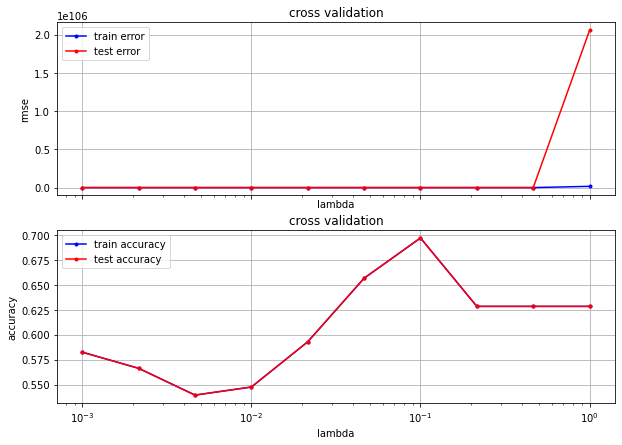

In [80]:
kwargs['initial_w'] = np.random.rand(30)
kwargs['max_iters'] = 50
gamma_space = np.logspace(-3, 0, 10)
best_gamma = cross_validation_hyper_search(y, tx, 'gamma', gamma_space , compute_accuracy, 'least_squares_GD', 8, **kwargs)
best_gamma

## Generate predictions and save ouput in csv format for submission:

In [8]:
DATA_TEST_PATH = 'data/test.csv'

# TODO standardise test data when required
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [27]:
OUTPUT_PATH = 'data/output.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [71]:
compute_accuracy(w, y, tx)

0.547484

In [77]:
np.logspace(-4, 0, 30)

array([1.00000000e-04, 1.37382380e-04, 1.88739182e-04, 2.59294380e-04,
       3.56224789e-04, 4.89390092e-04, 6.72335754e-04, 9.23670857e-04,
       1.26896100e-03, 1.74332882e-03, 2.39502662e-03, 3.29034456e-03,
       4.52035366e-03, 6.21016942e-03, 8.53167852e-03, 1.17210230e-02,
       1.61026203e-02, 2.21221629e-02, 3.03919538e-02, 4.17531894e-02,
       5.73615251e-02, 7.88046282e-02, 1.08263673e-01, 1.48735211e-01,
       2.04335972e-01, 2.80721620e-01, 3.85662042e-01, 5.29831691e-01,
       7.27895384e-01, 1.00000000e+00])